In [1]:
## Linear Regression in Python

In [2]:
## Packages Required

In [3]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split

import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

import os
import seaborn as sns

%matplotlib inline

In [5]:
# Reading dataset and creating dataframe
hospital = pd.read_csv(r"C:\Users\Administrator\Desktop\GIM term 2\PPA\Mission.csv")
hospital.head() # show 5 rows and all columns of dataframe

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,Ln(Total Cost),TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST_OF_IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,13.400439,474901,0,474901,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.603715,944819,96422,848397,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,12.800037,390000,30000,360000,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.353459,324910,0,324910,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.005551,254673,10000,244673,24,12,12,N,0,0


In [6]:
## summary data

In [7]:
hospital.shape

(248, 54)

In [8]:
dir(hospital)

['ACHD',
 'AGE',
 'ALERT',
 'AMBULANCE',
 'BODY_HEIGHT',
 'BODY_WEIGHT',
 'CONCESSION',
 'COST_OF_IMPLANT',
 'CREATININE',
 'Diabetes1',
 'Diabetes2',
 'ELECTIVE',
 'GENDER',
 'HB',
 'LENGTH_OF_STAY_ICU',
 'MALE',
 'RHD',
 'RR',
 'T',
 'TOTAL_COST_TO_HOSPITAL',
 'TOTAL_LENGTH_OF_STAY',
 'TRANSFERRED',
 'UNMARRIED',
 'UREA',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 

In [9]:
hospital.columns

Index(['SL.', 'AGE', 'GENDER', 'MALE', 'MARITAL STATUS', 'UNMARRIED',
       'KEY COMPLAINTS -CODE', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE AT THE TIME OF ARRIVAL', 'ALERT', 'TYPE OF ADMSN', 'ELECTIVE',
       'TOTAL_COST_TO_HOSPITAL', 'Ln(Total Cost)',
       'TOTAL AMOUNT BILLED TO THE PATIENT', 'CONCESSION',
       'ACTUAL RECEIVABLE AMOUNT', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'IMPLANT ', 'COST_OF_IMPLANT'],
      dtype='object')

In [10]:
hospital.describe()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TOTAL_COST_TO_HOSPITAL,Ln(Total Cost),TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH OF STAY- WARD,IMPLANT,COST_OF_IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.0000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879839,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,198723.330282,12.062084,182721.3750,17642.818548,167894.399194,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899358,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,122587.492984,0.505390,102104.1345,19992.417896,109345.870984,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46093.000000,10.738416,43641.0000,0.000000,31000.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,131652.750000,11.787923,150000.0000,0.000000,112500.000000,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,162660.500000,11.999419,150000.0000,10000.000000,122400.000000,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,220614.000000,12.304170,202638.5000,37500.000000,197000.000000,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,887350.000000,13.695995,944819.0000,123132.000000,848397.000000,41.000000,30.000000,22.000000,1.000000,196848.000000


In [11]:
## box plot Age

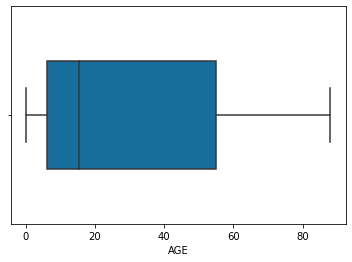

In [12]:
#using seaborn
hospital_age = sns.boxplot( x='AGE', 
                 data=hospital, 
                 width=0.5,
                 palette="colorblind")

In [13]:
# using matplotlib
hospital_age = hospital['AGE']

{'whiskers': [<matplotlib.lines.Line2D at 0x2244a022370>,
 'caps': [<matplotlib.lines.Line2D at 0x2244a022a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22449f30520>],
 'medians': [<matplotlib.lines.Line2D at 0x2244a02d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2244a02d430>],
 'means': []}

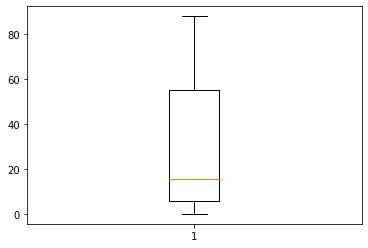

In [52]:
plt.boxplot(hospital_age)

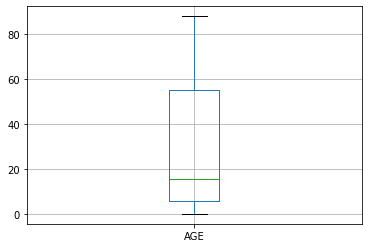

In [14]:
# using base  python
hospital.boxplot(column = 'AGE')

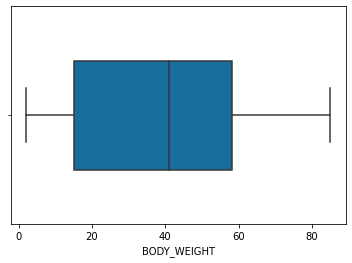

In [15]:
##outlier present 
hospital_BODY_WEIGHT = sns.boxplot( x='BODY_WEIGHT', 
                 data=hospital, 
                 width=0.5,
                 palette="colorblind")

In [22]:
# misssing trestment value

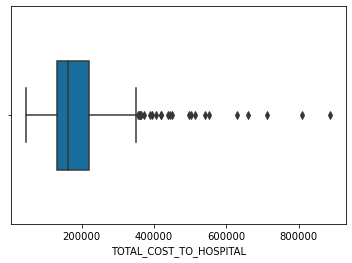

In [16]:
##outlier present in Total Cost to Hospital 
hospital_BODY_WEIGHT = sns.boxplot( x='TOTAL_COST_TO_HOSPITAL', 
                 data=hospital, 
                 width=0.5,
                 palette="colorblind")

In [18]:
## doubt - outlier treatment row number detection


In [19]:
## correlation

In [20]:
correlation = hospital.corr()

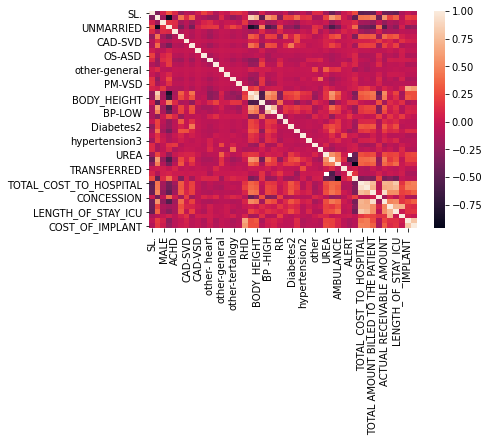

In [21]:
sns.heatmap(correlation)

In [22]:
# outlier using Z score

In [23]:
hospital.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,Ln(Total Cost),TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST_OF_IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,13.400439,474901,0,474901,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.603715,944819,96422,848397,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,12.800037,390000,30000,360000,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.353459,324910,0,324910,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.005551,254673,10000,244673,24,12,12,N,0,0


In [24]:
## hospital oulier detect

In [25]:
hospital_Z = np.abs(stats.zscore(hospital[["AGE","BODY_WEIGHT","BODY_HEIGHT","TOTAL_LENGTH_OF_STAY","LENGTH_OF_STAY_ICU","COST_OF_IMPLANT","TOTAL_COST_TO_HOSPITAL"]]))


In [26]:
print(hospital_Z)

[[1.12663216 0.49678959 0.76175027 ... 2.21652724 1.3714122  3.77284066]
 [1.16532124 0.1501028  0.63384636 ... 4.29674959 1.45009574 4.98942468]
 [2.05517001 0.41011789 0.86407339 ... 1.43644386 0.39780359 1.33650113]
 ...
 [0.58498509 0.88681223 0.73616949 ... 0.39633269 0.39780359 0.0615933 ]
 [1.20401032 1.19016317 0.88965417 ... 0.65636048 0.39780359 0.03337965]
 [0.04333801 1.45017827 1.27336589 ... 0.13630489 1.54833377 0.4036998 ]]


In [27]:

print(np.where(hospital_Z > 3))

(array([  0,   1,   1,   1,   3,   3,   5,   6,  11,  12,  12,  14,  35,
        35, 107, 116, 170], dtype=int64), array([6, 3, 4, 6, 5, 6, 3, 6, 4, 5, 6, 4, 3, 4, 5, 5, 5], dtype=int64))


In [28]:
# for a particular point

In [29]:
print(hospital_Z[0][6])

3.7728406563082983


In [30]:
## Outlier Removal from Data Set


In [31]:
hospital_M  = hospital[(hospital_Z < 3).all(axis=1)]

In [32]:
hospital_M.shape

(236, 54)

In [33]:
## Method 2 - Removing Outlier using IQR method

In [34]:
## First we will calculate IQR

In [35]:
Q1 = hospital.quantile(0.25)
Q3 = hospital.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SL.                                     123.500000
AGE                                      49.000000
MALE                                      1.000000
UNMARRIED                                 1.000000
ACHD                                      0.000000
CAD-DVD                                   0.000000
CAD-SVD                                   0.000000
CAD-TVD                                   0.000000
CAD-VSD                                   0.000000
OS-ASD                                    0.000000
other- heart                              0.000000
other- respiratory                        0.000000
other-general                             0.000000
other-nervous                             0.000000
other-tertalogy                           0.000000
PM-VSD                                    0.000000
RHD                                       0.000000
BODY_WEIGHT                              43.250000
BODY_HEIGHT                              55.000000
HR PULSE                       

In [36]:
## outlier detection

In [37]:
print(hospital < (Q1 - 1.5 * IQR)) |(hospital > (Q3 + 1.5 * IQR))

      ACHD  ACTUAL RECEIVABLE AMOUNT    AGE  ALERT  AMBULANCE  BODY_HEIGHT  \
0    False                     False  False  False      False        False   
1    False                     False  False  False      False        False   
2    False                     False  False  False      False        False   
3    False                     False  False  False      False        False   
4    False                     False  False  False      False        False   
..     ...                       ...    ...    ...        ...          ...   
243  False                     False  False  False      False        False   
244  False                     False  False  False      False        False   
245  False                     False  False  False      False        False   
246  False                     False  False  False      False        False   
247  False                     False  False  False      False        False   

     BODY_WEIGHT  BP -HIGH  BP-LOW  CAD-DVD  ...   UREA  hypert

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [38]:
hospital_Outlier_presence = hospital[~((hospital < (Q1 - 1.5 * IQR)) |(hospital > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
hospital_Outlier_presence.shape

(14, 54)

In [40]:
hospital_IQR = hospital[((hospital < (Q1 - 1.5 * IQR)) |(hospital > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
hospital_IQR.shape

(234, 54)

In [42]:
## correlation of selected columns

In [43]:
type(hospital)

pandas.core.frame.DataFrame

In [44]:
hospital_corr = hospital[["AGE","BODY_WEIGHT","BODY_HEIGHT","TOTAL_LENGTH_OF_STAY","LENGTH_OF_STAY_ICU","COST_OF_IMPLANT","TOTAL_COST_TO_HOSPITAL"]]

In [45]:
hsop_corr = hospital_corr.corr()

In [46]:
hsop_corr.head(4)

,AGE,BODY_WEIGHT,BODY_HEIGHT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,COST_OF_IMPLANT,TOTAL_COST_TO_HOSPITAL
AGE,1.000000,0.848448,0.717491,0.215106,0.345178,0.182170,0.420695
BODY_WEIGHT,0.848448,1.000000,0.850213,0.053525,0.228402,0.277595,0.348358
BODY_HEIGHT,0.717491,0.850213,1.000000,0.002191,0.137965,0.277072,0.293828
TOTAL_LENGTH_OF_STAY,0.215106,0.053525,0.002191,1.000000,0.722155,0.107599,0.698709


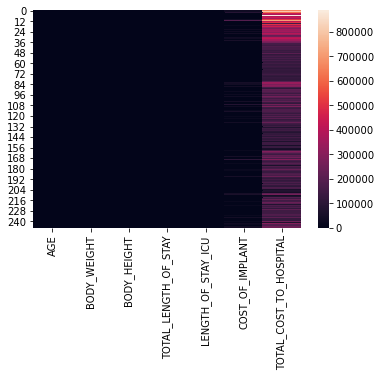

In [47]:
sns.heatmap(hospital_corr)

In [48]:
# convert into csv file
hsop_corr.to_csv(r"C:\Users\Administrator\Desktop\GIM term 2\PPA.csv")

In [49]:
### split data set

In [50]:

# Now creating training and testing dataset from orginal walmart dataset
# 80% for training & 30% for model validation
train,test=train_test_split(hospital_IQR,test_size=0.3,random_state=2)

In [51]:
# this function tells the dimensions of the data frame
train.shape

(163, 54)

In [52]:
test.shape

(71, 54)

In [53]:
hospital_IQR.corr()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TOTAL_COST_TO_HOSPITAL,Ln(Total Cost),TOTAL AMOUNT BILLED TO THE PATIENT,CONCESSION,ACTUAL RECEIVABLE AMOUNT,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH OF STAY- WARD,IMPLANT,COST_OF_IMPLANT
SL.,1.000000,-0.349989,0.065709,0.318617,0.096735,-0.245594,-0.082662,-0.131842,0.023520,0.213843,...,-0.543948,-0.517107,-0.465532,0.053329,-0.428311,-0.457628,-0.484138,-0.150442,-0.061773,-0.123498
AGE,-0.349989,1.000000,-0.196649,-0.896557,-0.137561,0.424411,0.119370,0.381730,-0.066151,-0.128765,...,0.419656,0.437727,0.502108,-0.380431,0.559687,0.201478,0.340955,-0.070530,0.202560,0.178235
MALE,0.065709,-0.196649,1.000000,0.174660,0.124798,-0.167522,-0.065023,-0.206773,-0.045879,0.076645,...,-0.155771,-0.181337,-0.251548,-0.045568,-0.246185,-0.109960,-0.153741,0.000643,0.064289,0.027245
UNMARRIED,0.318617,-0.896557,0.174660,1.000000,0.110909,-0.346522,-0.102913,-0.374711,0.059105,0.165955,...,-0.371886,-0.396786,-0.466999,0.358751,-0.531453,-0.148237,-0.274255,0.077338,-0.274798,-0.223313
ACHD,0.096735,-0.137561,0.124798,0.110909,1.000000,-0.107363,-0.027601,-0.100497,-0.019475,-0.077800,...,-0.176991,-0.240366,-0.177418,0.046434,-0.182474,-0.137199,-0.139207,-0.053897,-0.076085,-0.078428
CAD-DVD,-0.245594,0.424411,-0.167522,-0.346522,-0.107363,1.000000,-0.033533,-0.122094,-0.023660,-0.094519,...,0.311079,0.300085,0.329853,-0.169523,0.389462,0.269252,0.314616,0.051753,-0.021495,0.001230
CAD-SVD,-0.082662,0.119370,-0.065023,-0.102913,-0.027601,-0.033533,1.000000,-0.031388,-0.006083,-0.024299,...,0.049462,0.054360,0.088004,0.206990,0.042821,0.088165,-0.025446,0.151946,0.066313,0.045522
CAD-TVD,-0.131842,0.381730,-0.206773,-0.374711,-0.100497,-0.122094,-0.031388,1.000000,-0.022147,-0.088475,...,0.205275,0.224981,0.208827,-0.168434,0.216795,0.062345,0.204879,-0.120097,-0.070126,-0.073819
CAD-VSD,0.023520,-0.066151,-0.045879,0.059105,-0.019475,-0.023660,-0.006083,-0.022147,1.000000,-0.017145,...,-0.032682,-0.028812,-0.049506,-0.055372,-0.038192,0.002056,-0.042963,0.046988,-0.033716,-0.026957
OS-ASD,0.213843,-0.128765,0.076645,0.165955,-0.077800,-0.094519,-0.024299,-0.088475,-0.017145,1.000000,...,-0.129310,-0.118845,-0.106172,0.105104,-0.125309,-0.075088,-0.118348,0.022737,-0.134690,-0.107690


In [55]:
(hospital_IQR.corr()).to_csv('hospital_corr.csv', header=True, index=True)

In [56]:
## drop dependent variable

In [57]:
x_train=train.drop('TOTAL_COST_TO_HOSPITAL',axis=1)
y_train=train['TOTAL_COST_TO_HOSPITAL']
x_test=test.drop('TOTAL_COST_TO_HOSPITAL',axis=1)
y_test=test['TOTAL_COST_TO_HOSPITAL']

In [59]:
# creating first model with all variables: Ordinary Least Square(OLS) Technique used
model1 = ols("TOTAL_COST_TO_HOSPITAL ~ AGE",data=train).fit()

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     TOTAL_COST_TO_HOSPITAL   R-squared:                       0.144
Model:                                OLS   Adj. R-squared:                  0.139
Method:                     Least Squares   F-statistic:                     27.11
Date:                    Sat, 16 Jan 2021   Prob (F-statistic):           5.80e-07
Time:                            10:49:14   Log-Likelihood:                -2106.1
No. Observations:                     163   AIC:                             4216.
Df Residuals:                         161   BIC:                             4222.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.459e+05   1.14e+04     12.777      0.000    1.23e+05    1.68e+05
AGE         1605.0495    308.261      5.207      0.000     996.293    2213.806
==============================================================================
Omnibus:                       94.284   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.738
Skew:                           2.121   Prob(JB):                    1.03e-117
Kurtosis:                      10.831   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model1 = ols("TOTAL_COST_TO_HOSPITAL ~ AGE ",data=train).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     TOTAL_COST_TO_HOSPITAL   R-squared:                       0.144
Model:                                OLS   Adj. R-squared:                  0.139
Method:                     Least Squares   F-statistic:                     27.11
Date:                    Sat, 16 Jan 2021   Prob (F-statistic):           5.80e-07
Time:                            10:54:26   Log-Likelihood:                -2106.1
No. Observations:                     163   AIC:                             4216.
Df Residuals:                         161   BIC:                             4222.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.459e+05   1.14e+04     12.777      0.000    1.23e+05    1.68e+05
AGE         1605.0495    308.261      5.207      0.000     996.293    2213.806
==============================================================================
Omnibus:                       94.284   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.738
Skew:                           2.121   Prob(JB):                    1.03e-117
Kurtosis:                      10.831   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
model2 = ols("TOTAL_COST_TO_HOSPITAL ~ BODY_WEIGHT+TOTAL_LENGTH_OF_STAY+LENGTH_OF_STAY_ICU+COST_OF_IMPLANT ",data=train).fit()

In [68]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     TOTAL_COST_TO_HOSPITAL   R-squared:                       0.870
Model:                                OLS   Adj. R-squared:                  0.867
Method:                     Least Squares   F-statistic:                     264.8
Date:                    Sat, 16 Jan 2021   Prob (F-statistic):           6.27e-69
Time:                            10:57:00   Log-Likelihood:                -1952.4
No. Observations:                     163   AIC:                             3915.
Df Residuals:                         158   BIC:                             3930.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.084e+04   9578.566      3.220      0.002    1.19e+04    4.98e+04
BODY_WEIGHT            516.8268    141.991      3.640      0.000     236.381     797.272
TOTAL_LENGTH_OF_STAY  6277.3658    842.972      7.447      0.000    4612.418    7942.314
LENGTH_OF_STAY_ICU    1.639e+04   1368.827     11.970      0.000    1.37e+04    1.91e+04
COST_OF_IMPLANT          2.1723      0.205     10.575      0.000       1.767       2.578
==============================================================================
Omnibus:                       16.288   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.837
Skew:                           0.225   Prob(JB):                     1.51e-11
Kurtosis:                       5.671   Cond. No.                     5.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# checking the assumption of Linear regression
# Checking multicollinearity
X = add_constant(train)


In [94]:
print(X)

     const  SL.    AGE GENDER  MALE MARITAL STATUS  UNMARRIED  \
47     1.0   48  64.00      M     0        MARRIED          0   
194    1.0  195   3.00      M     0      UNMARRIED          1   
174    1.0  175  13.00      M     0      UNMARRIED          1   
244    1.0  245  58.00      M     0        MARRIED          0   
203    1.0  204  10.00      M     0      UNMARRIED          1   
..     ...  ...    ...    ...   ...            ...        ...   
44     1.0   45   3.00      M     0      UNMARRIED          1   
22     1.0   23  60.00      M     0        MARRIED          0   
86     1.0   87   0.58      F     1      UNMARRIED          1   
15     1.0   16  78.00      F     1        MARRIED          0   
182    1.0  183   0.42      M     0      UNMARRIED          1   

    KEY COMPLAINTS -CODE  ACHD  CAD-DVD  ...  Ln(Total Cost)  \
47                           0        0  ...       11.893473   
194               PM-VSD     0        0  ...       11.694221   
174      other-tertalogy   

In [88]:
train.dtypes

SL.                                     int64
AGE                                   float64
GENDER                                 object
MALE                                    int64
MARITAL STATUS                         object
UNMARRIED                               int64
KEY COMPLAINTS -CODE                   object
ACHD                                    int64
CAD-DVD                                 int64
CAD-SVD                                 int64
CAD-TVD                                 int64
CAD-VSD                                 int64
OS-ASD                                  int64
other- heart                            int64
other- respiratory                      int64
other-general                           int64
other-nervous                           int64
other-tertalogy                         int64
PM-VSD                                  int64
RHD                                     int64
BODY_WEIGHT                             int64
BODY_HEIGHT                       

In [99]:
X = add_constant(hospital_IQR)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

TypeError: '>=' not supported between instances of 'float' and 'str'

In [111]:
#actually considering missing data(NaN, which are treated as floats) to look for the maximum value. s
#solved my problem usinf fill NA & convert obj datatype into string
#convert obj datatype into string

hospital_IQR[['IMPLANT USED (Y/N)','TYPE OF ADMSN','STATE AT THE TIME OF ARRIVAL','MODE OF ARRIVAL','PAST MEDICAL HISTORY CODE','KEY COMPLAINTS -CODE','MARITAL STATUS','GENDER']] = str(hospital_IQR[['IMPLANT USED (Y/N)','TYPE OF ADMSN','STATE AT THE TIME OF ARRIVAL','MODE OF ARRIVAL','PAST MEDICAL HISTORY CODE','KEY COMPLAINTS -CODE','MARITAL STATUS','GENDER']])


In [112]:
# fill NA values 
hospital_IQR[['IMPLANT USED (Y/N)','TYPE OF ADMSN','STATE AT THE TIME OF ARRIVAL','MODE OF ARRIVAL','PAST MEDICAL HISTORY CODE','KEY COMPLAINTS -CODE','MARITAL STATUS','GENDER']] = hospital_IQR[['IMPLANT USED (Y/N)','TYPE OF ADMSN','STATE AT THE TIME OF ARRIVAL','MODE OF ARRIVAL','PAST MEDICAL HISTORY CODE','KEY COMPLAINTS -CODE','MARITAL STATUS','GENDER']].fillna('')
np.where(pd.isnull(hospital_IQR))


(array([], dtype=int64), array([], dtype=int64))

In [113]:
X = add_constant(hospital_IQR)


In [114]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

TypeError: '>=' not supported between instances of 'float' and 'str'

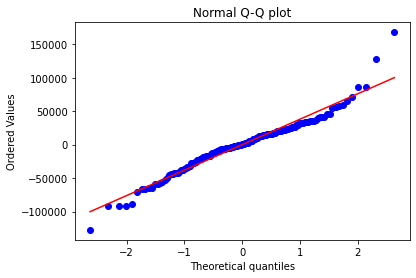

In [116]:
## check normality 
y_pred=model2.predict(x_train)
residual = y_train-y_pred

stats.probplot(residual, dist="norm",plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

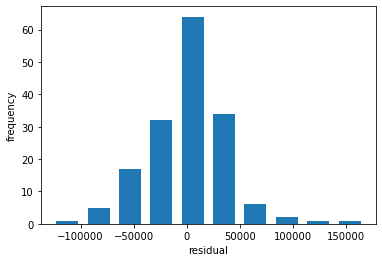

In [117]:
# 1. Checking normality of residuals
hist, bins = np.histogram(residual, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel('frequency')
plt.xlabel('residual')
plt.show()

In [118]:
# Shapiro-Wilk normality test
stats.shapiro(residual)
# (w, p-value)

ShapiroResult(statistic=0.9589543342590332, pvalue=9.856621909420937e-05)

# 3. Checking Homoscedasticity
plt.style.use('seaborn-whitegrid')
plt.plot(y_train,residual,'o')
plt.xlabel('y_train')
plt.ylabel('residual')

Text(0, 0.5, 'residual')

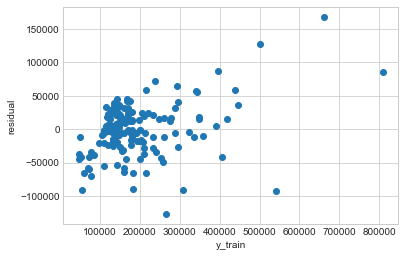

In [120]:
plt.style.use('seaborn-whitegrid')
plt.plot(y_train,residual,'o')
plt.xlabel('y_train')
plt.ylabel('residual')

H0: variance of residuals is const(homo condition), H1: var.of residuals not const(hetero)
We see that the p-value is 0.68. This is higher than 0.05, so we can no longer reject the null hypothesis of homoscedasticity.
In this regard, the Breusch-Pagan test has confirmed that our results are not influenced by heteroscedasticity and we are therefore reliable

Validation

In [123]:
predictions = model2.predict(x_test)

Text(0, 0.5, 'Actual')

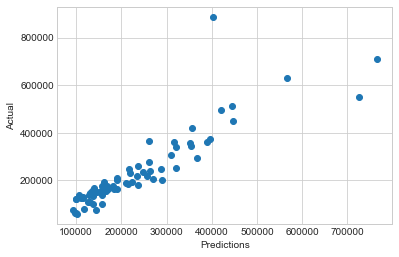

In [124]:
plt.plot(predictions,y_test,'o')
plt.xlabel('Predictions')
plt.ylabel('Actual')

Visualization tool:seaborn (widely used)


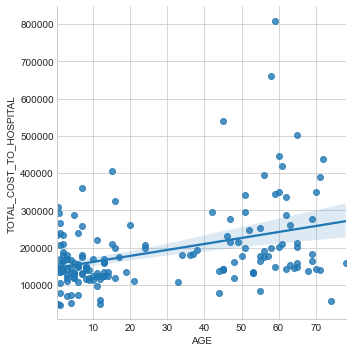

In [126]:
sns.lmplot('AGE','TOTAL_COST_TO_HOSPITAL',train,fit_reg=True)